# Import Libraries

In [84]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [85]:
patient_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

# Examine the Dataset

In [86]:
patient_data.shape

(1190, 12)

In [87]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [88]:
patient_data.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [89]:
patient_data.describe().T

count        mean         std   min    25%    50%  \
age                  1190.0   53.720168    9.358203  28.0   47.0   54.0   
sex                  1190.0    0.763866    0.424884   0.0    1.0    1.0   
chest pain type      1190.0    3.232773    0.935480   1.0    3.0    4.0   
resting bp s         1190.0  132.153782   18.368823   0.0  120.0  130.0   
cholesterol          1190.0  210.363866  101.420489   0.0  188.0  229.0   
fasting blood sugar  1190.0    0.213445    0.409912   0.0    0.0    0.0   
resting ecg          1190.0    0.698319    0.870359   0.0    0.0    0.0   
max heart rate       1190.0  139.732773   25.517636  60.0  121.0  140.5   
exercise angina      1190.0    0.387395    0.487360   0.0    0.0    0.0   
oldpeak              1190.0    0.922773    1.086337  -2.6    0.0    0.6   
ST slope             1190.0    1.624370    0.610459   0.0    1.0    2.0   
target               1190.0    0.528571    0.499393   0.0    0.0    1.0   

                        75%    max  
age                   60.00   77.0  
sex                    1.00    1.0  
chest pain type        4.00    4.0  
resting bp s         140.00  200.0  
cholesterol          269.75  603.0  
fasting blood sugar    0.00    1.0  
resting ecg            2.00    2.0  
max heart rate       160.00  202.0  
exercise angina        1.00    1.0  
oldpeak                1.60    6.2  
ST slope               2.00    3.0  
target                 1.00    1.0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

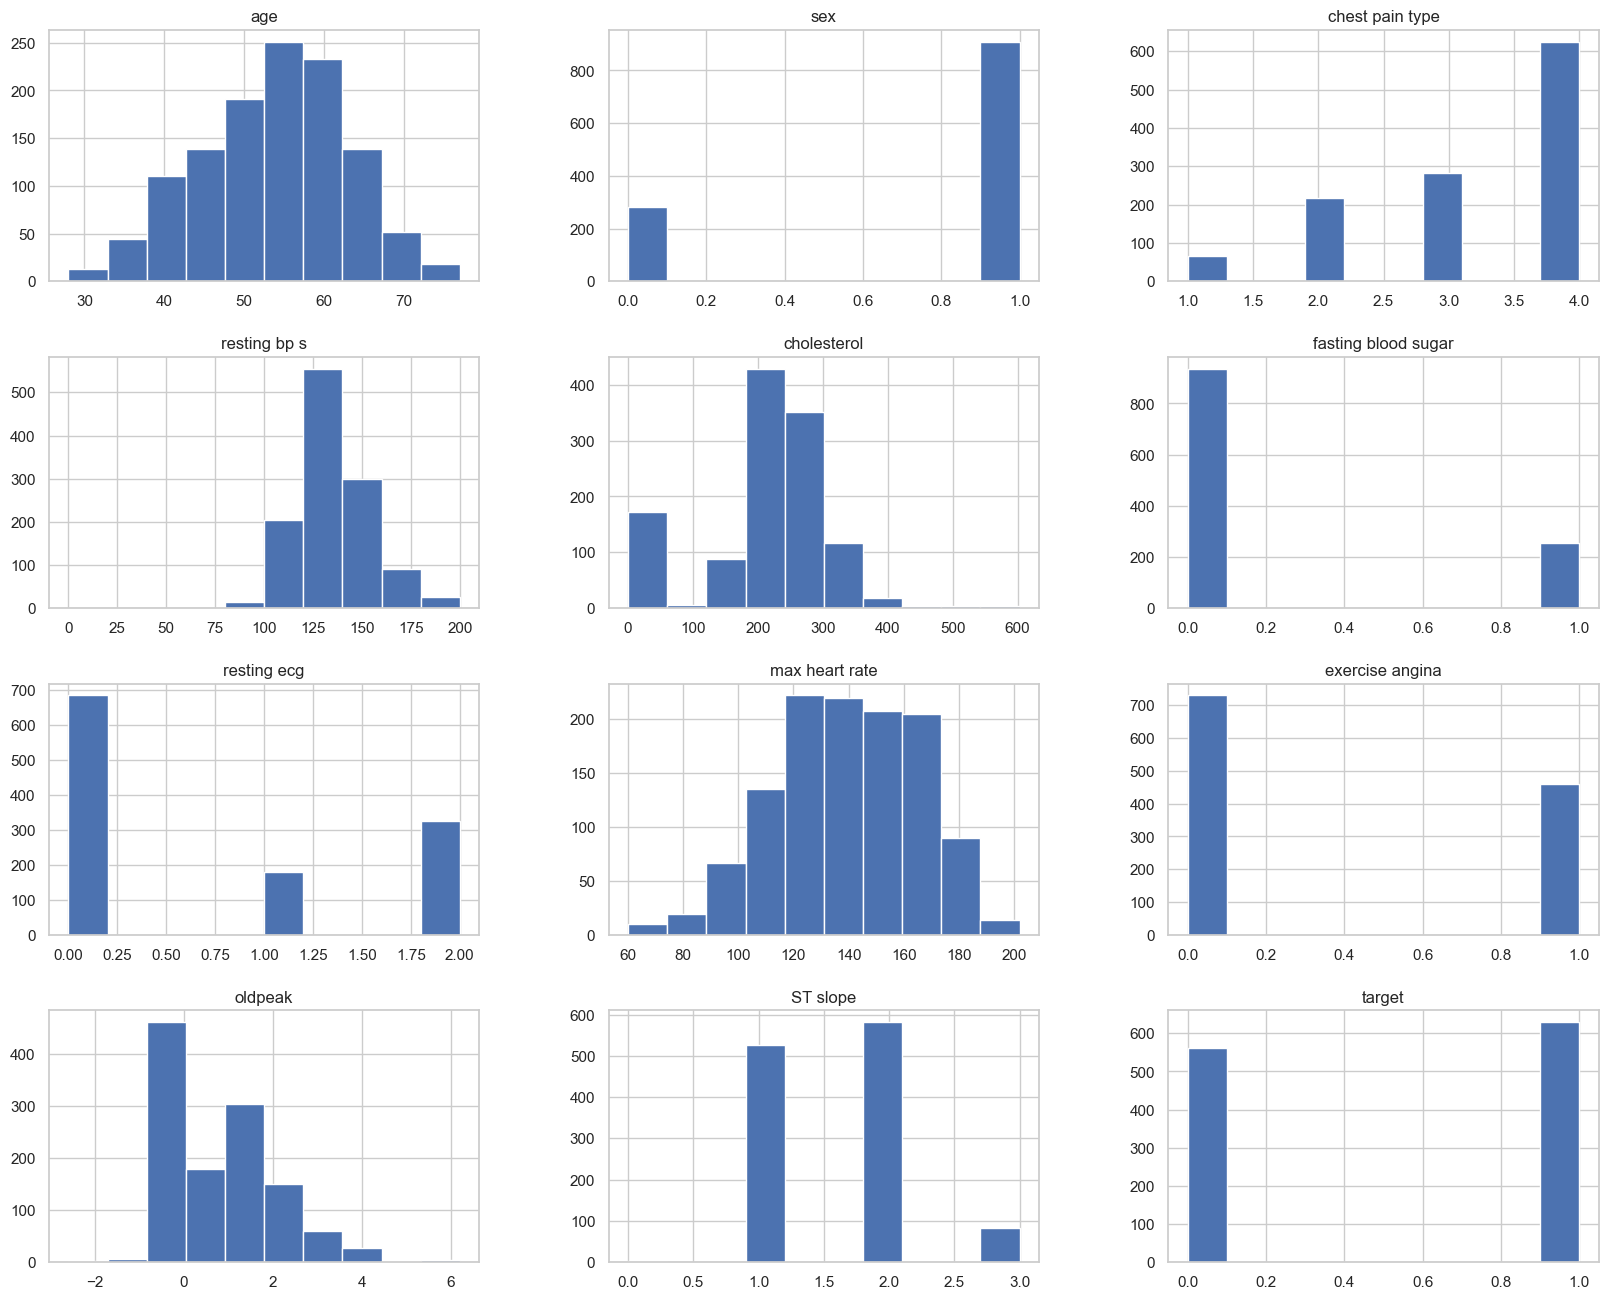

In [114]:
patient_data.hist(figsize=(20, 16))

# Heatmap

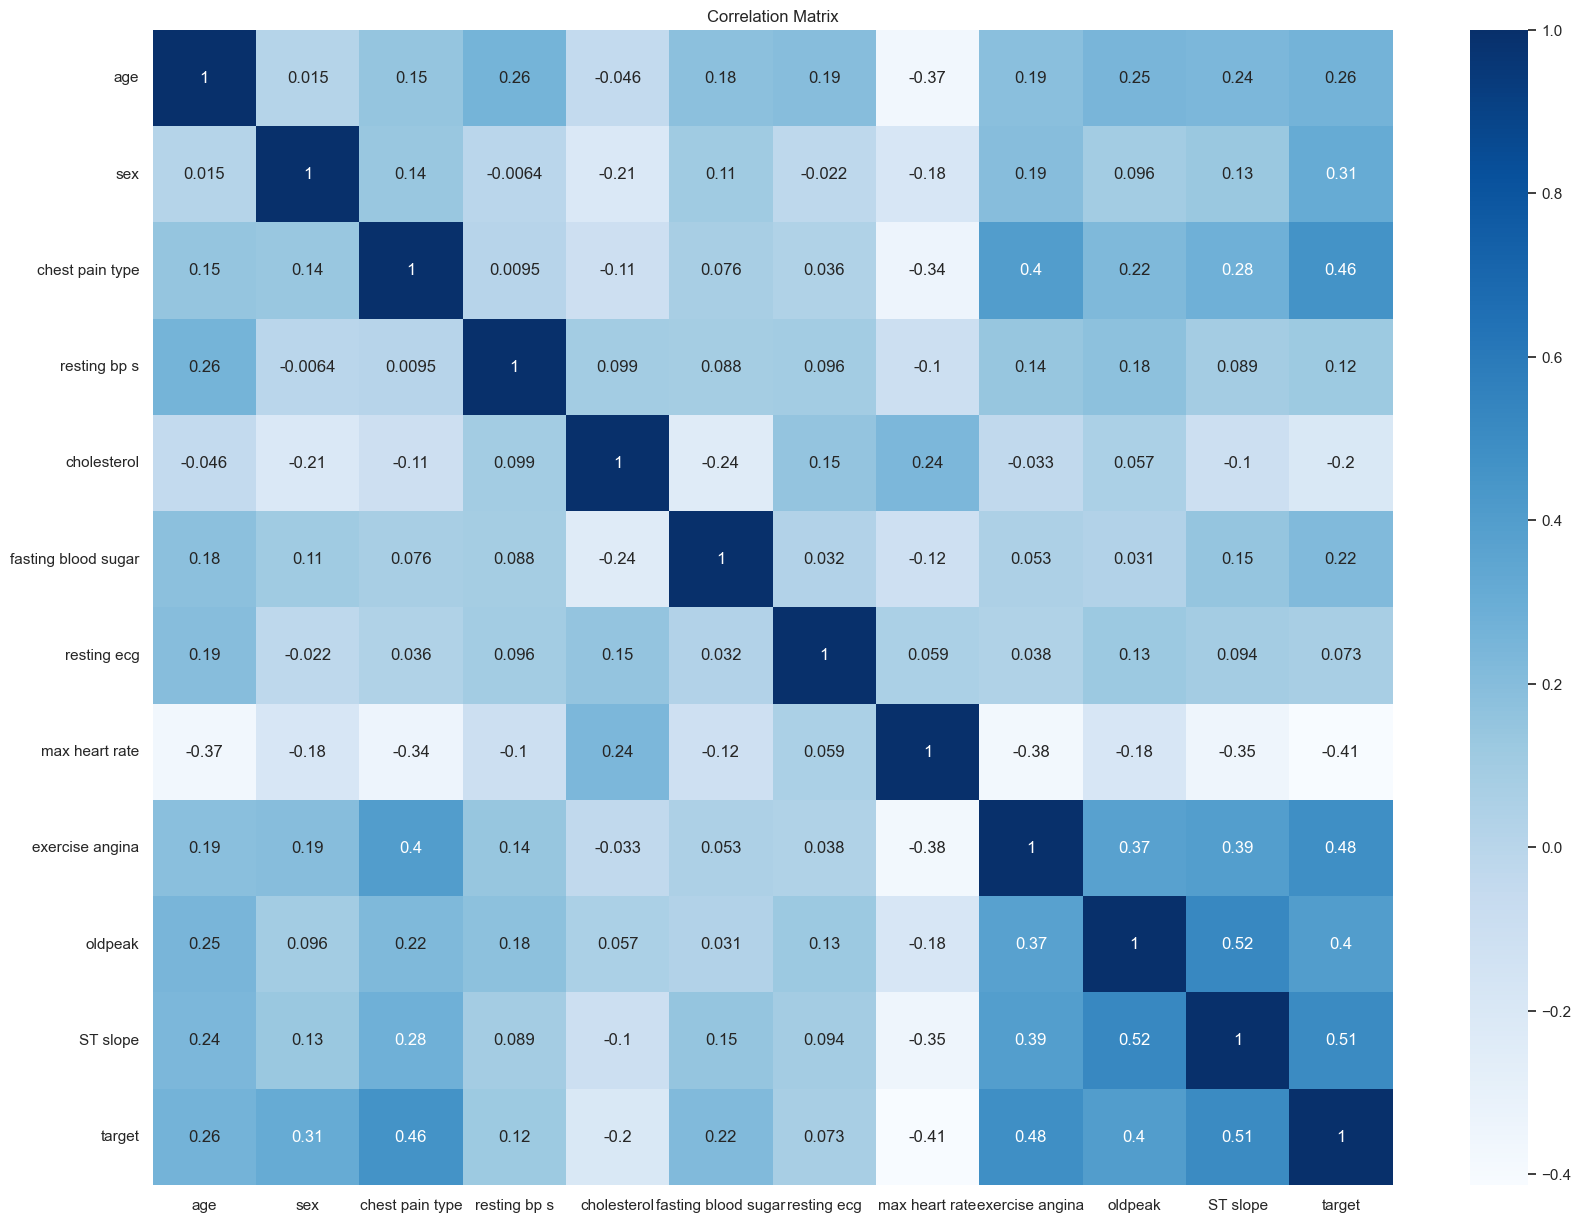

In [90]:
corr_matrix = patient_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# Check for Null Values

In [91]:
patient_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [92]:
patient_data.duplicated().sum()

272

In [93]:
patient_data["target"].value_counts()

target
1    629
0    561
Name: count, dtype: int64

# Setting Target

In [94]:
X_normal = patient_data.drop("target", axis=1)
Y = patient_data["target"]

# Scaling the Data

In [95]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns=X_normal.columns)
X.head()

age       sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728  0.555995        -1.318351      0.427328     0.775674   
1 -0.504600 -1.798576        -0.248932      1.516587    -0.299512   
2 -1.787437  0.555995        -1.318351     -0.117301     0.716489   
3 -0.611503 -1.798576         0.820487      0.318402     0.035867   
4  0.029915  0.555995        -0.248932      0.971958    -0.151550   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0            -0.520929    -0.802672        1.265039        -0.795219   
1            -0.520929    -0.802672        0.637758        -0.795219   
2            -0.520929     0.346762       -1.636136        -0.795219   
3            -0.520929    -0.802672       -1.244085         1.257515   
4            -0.520929    -0.802672       -0.695214        -0.795219   

    oldpeak  ST slope  
0 -0.849792 -1.023217  
1  0.071119  0.615583  
2 -0.849792 -1.023217  
3  0.531575  0.615583  
4 -0.849792 -1.023217

In [96]:
Y.value_counts()

target
1    629
0    561
Name: count, dtype: int64

# Train-Test Split

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Model Training and Evaluation

## 1. Logistic Regression

Accuracy of Logistic Regression model: 86.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



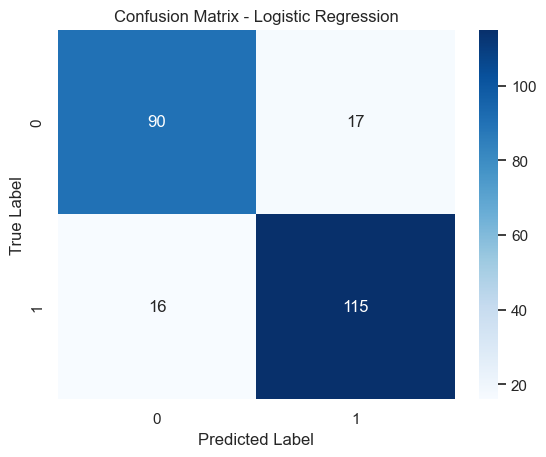

In [98]:
logreg_model = LogisticRegression(solver="liblinear", random_state=42)

logreg_model.fit(X_train, Y_train)

logreg_predict = logreg_model.predict(X_test)

logreg_acc_score = accuracy_score(Y_test, logreg_predict)

print(
    "Accuracy of Logistic Regression model:", "{:.2f}%".format(logreg_acc_score * 100)
)

print("\nClassification Report:")
lr_cr = classification_report(Y_test, logreg_predict)
print(lr_cr)

logreg_cm = confusion_matrix(Y_test, logreg_predict)

sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

## 2. Decision Tree

Accuracy of DecisionTreeClassifier: 84.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       107
           1       0.81      0.92      0.86       131

    accuracy                           0.84       238
   macro avg       0.85      0.83      0.84       238
weighted avg       0.85      0.84      0.84       238



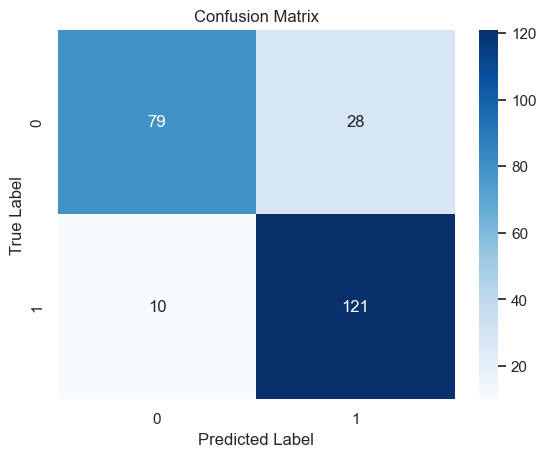

In [99]:
DT = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=4)

model = DT.fit(X_train, Y_train)

DT_predict = DT.predict(X_test)

DT_acc_score = accuracy_score(Y_test, DT_predict)

print("Accuracy of DecisionTreeClassifier:", "{:.2f}%".format(DT_acc_score * 100))

print("\nClassification Report:")
dt_cr = classification_report(Y_test, DT_predict)
print(dt_cr)

DT_cm = confusion_matrix(Y_test, DT_predict)

sns.heatmap(DT_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

## 3. Random Forest

Accuracy of Random Forest: 90.34%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       107
           1       0.90      0.93      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



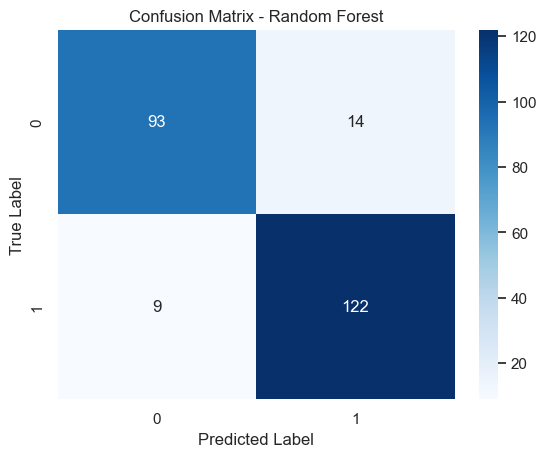

In [100]:
RF = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)

RF.fit(X_train, Y_train)

RF_predict = RF.predict(X_test)

RF_acc_score = accuracy_score(Y_test, RF_predict)

print("Accuracy of Random Forest:", "{:.2f}%".format(RF_acc_score * 100))

print("\nClassification Report:")
rf_cr = classification_report(Y_test, RF_predict)
print(rf_cr)

RF_cm = confusion_matrix(Y_test, RF_predict)

sns.heatmap(RF_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

## 4. KNN

In [101]:
KNN = KNeighborsClassifier(n_neighbors=10)

KNN.fit(X_train, Y_train)

KNN_predict = KNN.predict(X_test)

KNN_acc_score = accuracy_score(Y_test, KNN_predict)

print("Accuracy of K-Neighbors Classifier:", "{:.2f}%".format(KNN_acc_score * 100, "\n"))

print("\nClassification Report:")
knn_cr = classification_report(Y_test, KNN_predict)
print(knn_cr)

KNN_cm = confusion_matrix(Y_test, KNN_predict)

sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - K-Neighbors Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

Accuracy of K-Neighbors Classifier:

 87.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.90      0.87      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



## 5. SVM

Accuracy of Support Vector Classifier:

 89.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       107
           1       0.87      0.95      0.91       131

    accuracy                           0.89       238
   macro avg       0.90      0.89      0.89       238
weighted avg       0.90      0.89      0.89       238



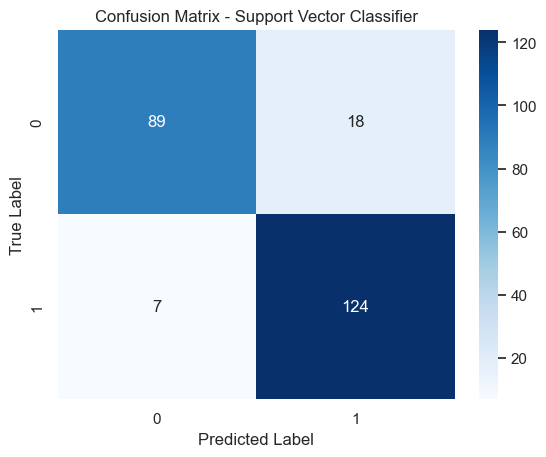

In [102]:
SVM = SVC(kernel="rbf", C=2)

SVM.fit(X_train, Y_train)

SVM_predict = SVM.predict(X_test)

SVM_acc_score = accuracy_score(Y_test, SVM_predict)

print("Accuracy of Support Vector Classifier:", "{:.2f}%".format(SVM_acc_score * 100))

print("\nClassification Report:")
svm_cr = classification_report(Y_test, SVM_predict)
print(svm_cr)

SVM_cm = confusion_matrix(Y_test, SVM_predict)

sns.heatmap(SVM_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

## 6. Naive Bayes

Accuracy of Naive Bayes model: 85.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



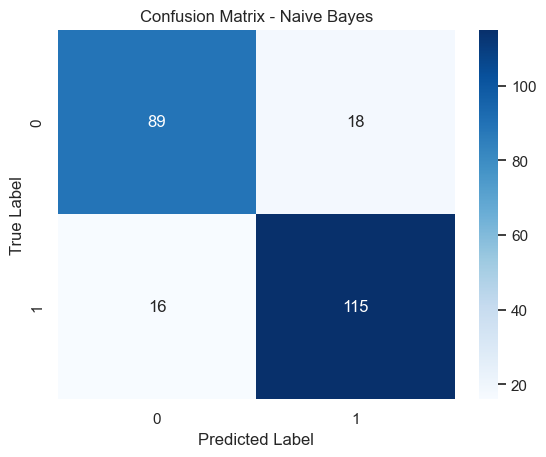

In [103]:
NB = GaussianNB()

NB.fit(X_train, Y_train)

NB_predict = NB.predict(X_test)

NB_acc_score = accuracy_score(Y_test, NB_predict)

print("Accuracy of Naive Bayes model:", "{:.2f}%".format(NB_acc_score * 100))

print("\nClassification Report:")
nb_cr = classification_report(Y_test, NB_predict)
print(nb_cr)

NB_cm = confusion_matrix(Y_test, NB_predict)

sns.heatmap(NB_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

## 7. Adaboost

Accuracy of AdaBoost model: 89.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.89      0.92      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



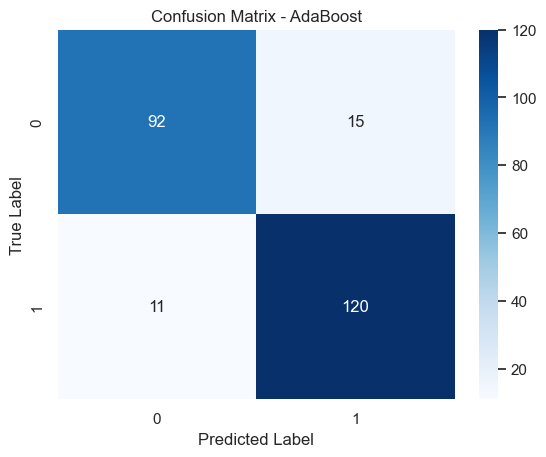

In [104]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, Y_train)

adaboost_predict = adaboost_classifier.predict(X_test)

adaboost_acc_score = accuracy_score(Y_test, adaboost_predict)

print("Accuracy of AdaBoost model:", "{:.2f}%".format(adaboost_acc_score * 100))

print("\nClassification Report:")
ab_cr = classification_report(Y_test, adaboost_predict)
print(ab_cr)

adaboost_cm = confusion_matrix(Y_test, adaboost_predict)

sns.heatmap(adaboost_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

# Comparison

## 1. Comparison Table

In [105]:
comparison = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Decision Tree",
            "Random Forest",
            "KNN",
            "SVM",
            "Naive Bayes",
            "Adaboost",
        ],
        "Accuracy": [
            "{:.2f}%".format(logreg_acc_score * 100),
            "{:.2f}%".format(DT_acc_score * 100),
            "{:.2f}%".format(RF_acc_score * 100),
            "{:.2f}%".format(KNN_acc_score * 100),
            "{:.2f}%".format(SVM_acc_score * 100),
            "{:.2f}%".format(NB_acc_score * 100),
            "{:.2f}%".format(adaboost_acc_score * 100),
        ],
    }
)

print("Comparison Table:")
print(comparison)

Comparison Table:
                 Model Accuracy
0  Logistic Regression   86.13%
1        Decision Tree   84.03%
2        Random Forest   90.34%
3                  KNN   87.39%
4                  SVM   89.50%
5          Naive Bayes   85.71%
6             Adaboost   89.08%


## 2. Comparison Bar Plot

In [118]:
comparison_sorted = comparison.sort_values(by="Accuracy")

plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x="Model", y="Accuracy", data=comparison_sorted, color="b")

sns.despine(left=True)

plt.gca().invert_yaxis()

plt.title("Model Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)

plt.show()


## 3. All Confusion Matrices

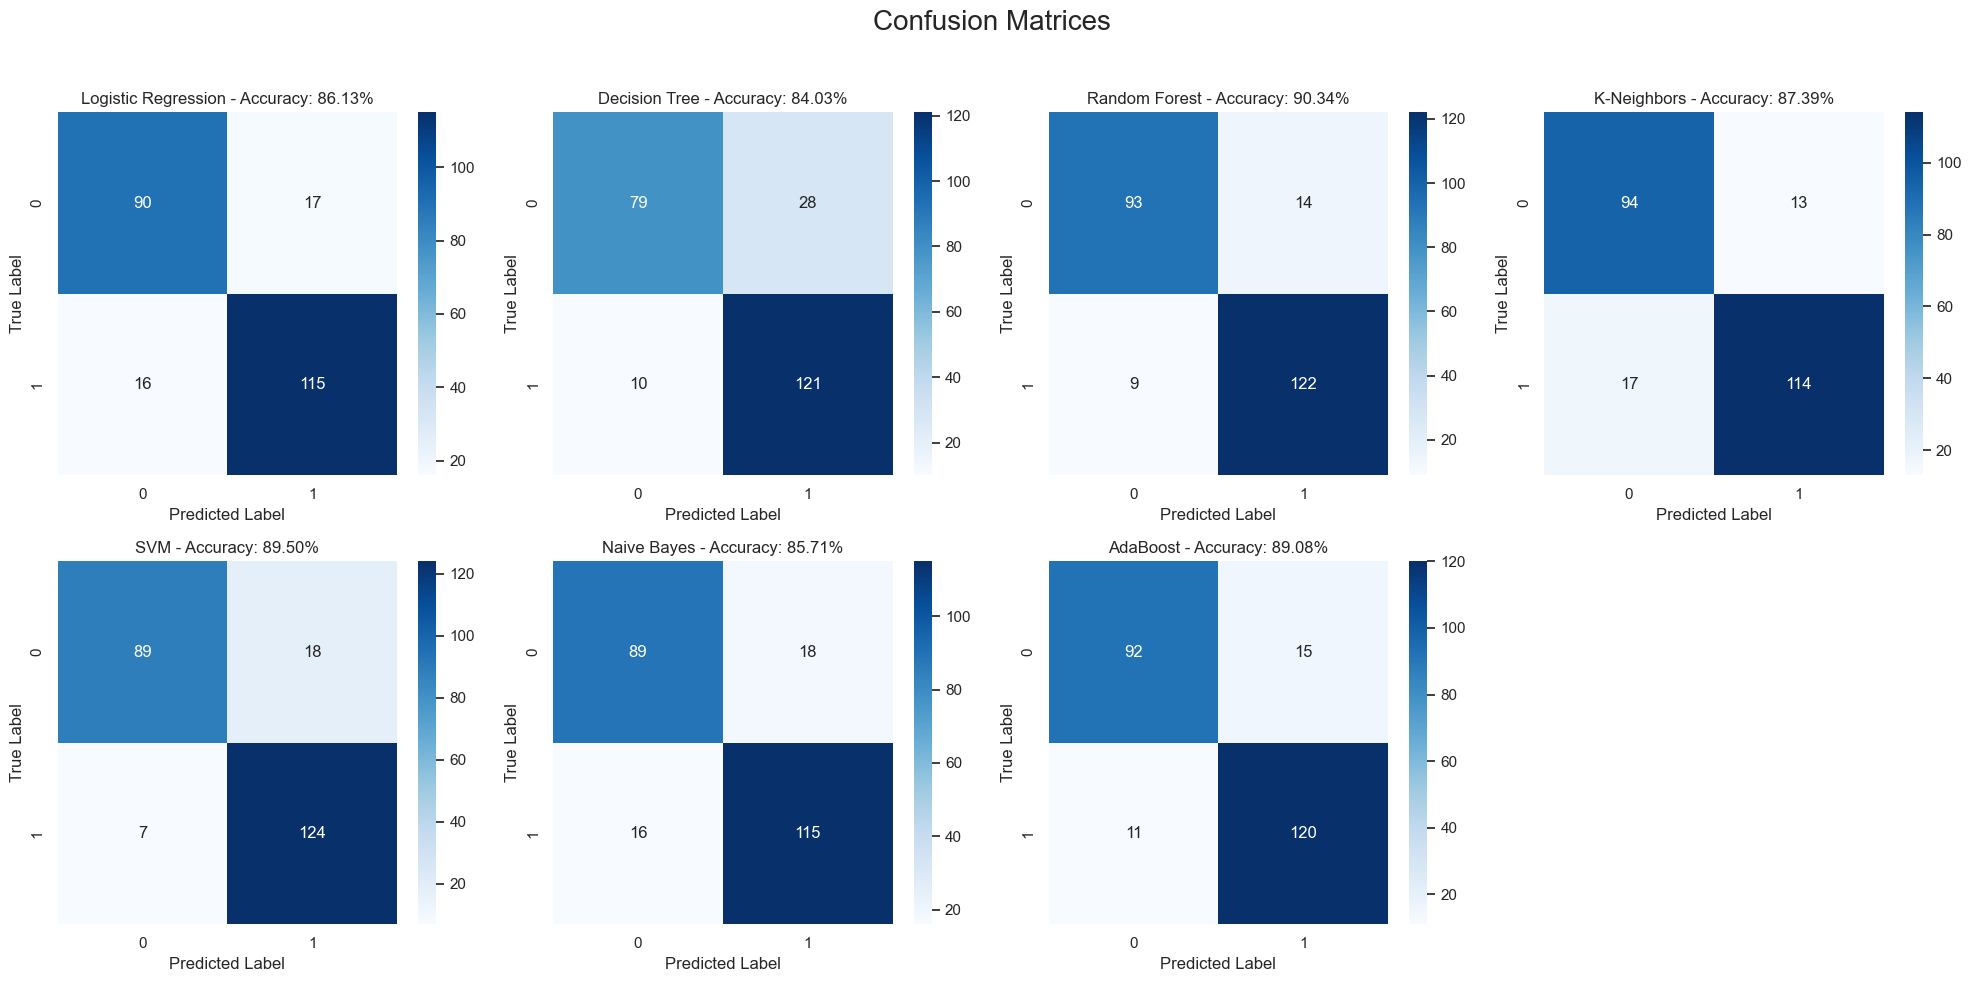

In [107]:
num_classifiers = 7
num_rows = (num_classifiers - 1) // 4 + 1
num_cols = min(num_classifiers, 4)

fig, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows)
)
fig.suptitle("Confusion Matrices", fontsize=20)

classifiers = [
    ("Logistic Regression", logreg_cm, logreg_acc_score),
    ("Decision Tree", DT_cm, DT_acc_score),
    ("Random Forest", RF_cm, RF_acc_score),
    ("K-Neighbors", KNN_cm, KNN_acc_score),
    ("SVM", SVM_cm, SVM_acc_score),
    ("Naive Bayes", NB_cm, NB_acc_score),
    ("AdaBoost", adaboost_cm, adaboost_acc_score),
]

for (name, cm, acc_score), ax in zip(classifiers, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_title(f"{name} - Accuracy: {acc_score * 100:.2f}%")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 4. Classification Report Comparison Bar Plots

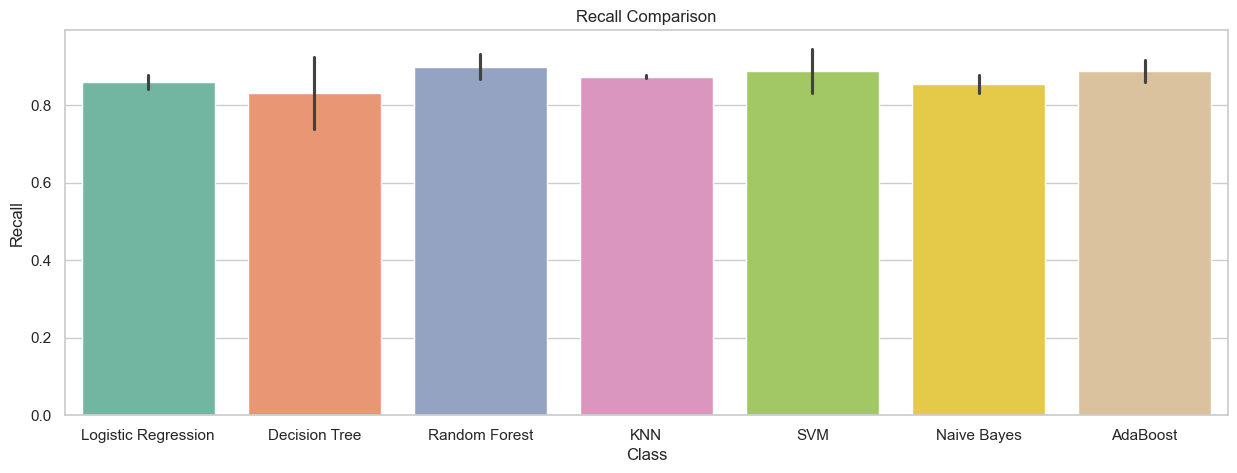

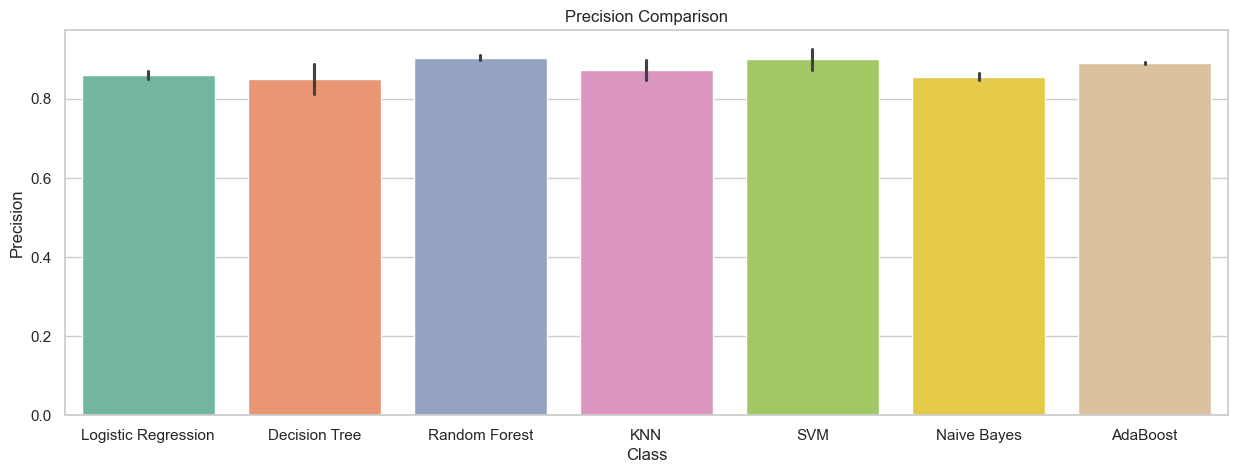

In [116]:
lr_cr = classification_report(Y_test, logreg_predict, output_dict=True)
dt_cr = classification_report(Y_test, DT_predict, output_dict=True)
rf_cr = classification_report(Y_test, RF_predict, output_dict=True)
knn_cr = classification_report(Y_test, KNN_predict, output_dict=True)
svm_cr = classification_report(Y_test, SVM_predict, output_dict=True)
nb_cr = classification_report(Y_test, NB_predict, output_dict=True)
ab_cr = classification_report(Y_test, adaboost_predict, output_dict=True)

classification_reports = [lr_cr, dt_cr, rf_cr, knn_cr, svm_cr, nb_cr, ab_cr]

f1_scores = {}
recall_scores = {}
precision_scores = {}

for name, cr in zip(
    [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "SVM",
        "Naive Bayes",
        "AdaBoost",
    ],
    classification_reports,
):
    f1_scores[name] = [
        cr[label]["f1-score"] for label in cr.keys() if label.isnumeric()
    ]
    recall_scores[name] = [
        cr[label]["recall"] for label in cr.keys() if label.isnumeric()
    ]
    precision_scores[name] = [
        cr[label]["precision"] for label in cr.keys() if label.isnumeric()
    ]


df_f1 = pd.DataFrame(
    f1_scores, index=[str(i) for i in range(1, len(f1_scores["Decision Tree"]) + 1)]
)
df_recall = pd.DataFrame(
    recall_scores,
    index=[str(i) for i in range(1, len(recall_scores["Decision Tree"]) + 1)],
)
df_precision = pd.DataFrame(
    precision_scores,
    index=[str(i) for i in range(1, len(precision_scores["Decision Tree"]) + 1)],
)


plt.figure(figsize=(15, 5))
sns.barplot(data=df_f1, palette="Set2")
plt.title("F1-Score Comparison")
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df_recall, palette="Set2")
plt.title("Recall Comparison")
plt.xlabel("Class")
plt.ylabel("Recall")
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(data=df_precision, palette="Set2")
plt.title("Precision Comparison")
plt.xlabel("Class")
plt.ylabel("Precision")
plt.show()